# 2. Regression and interpolation


In [1]:
import numpy as np

## (a) Linear interpolation vs cubic spline, using $\rm{linear\_data.txt}$.

    i. Find the linear interpolation line through each section of the data, and plot the predicted y values over the range of data.


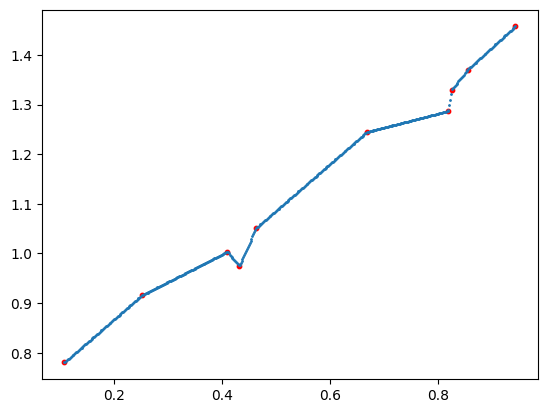

In [2]:
class LinearInterpolator:

    def __init__(self, x, y):
        # y* =   y0 + (y1 - y0) / (x1 - x0) * (x* - x0) (x0 <= x* <= x1)
        #    =   (y1 - y0) / (x1 - x0) * x* + y0 - (y1 - y0) / (x1 - x0) * x0
        self.y = np.array(y)
        self.x = np.array(x)
        self.y1 = self.y[1:]
        self.y0 = self.y[:-1]
        self.x1 = self.x[1:]
        self.x0 = self.x[:-1]
        self.a = (self.y1 - self.y0) / (self.x1 - self.x0)
        self.b = self.y0 - self.a * self.x0
    def interpolate(self, x_pred):
        idx = np.searchsorted(self.x1, x_pred)
        y_pred = self.a[idx] * x_pred + self.b[idx]
        return y_pred

    def plot(self):
        import matplotlib.pyplot as plt
        plt.scatter(self.x, self.y, color='red', s=10)
        rand_x = np.linspace(self.x0[0], self.x1[-1], 500)
        rand_y = self.interpolate(rand_x)
        plt.scatter(rand_x, rand_y, s=1)
        plt.show()
xarr = np.loadtxt('linear_data.txt')[:,0]
yarr = np.loadtxt('linear_data.txt')[:,1]

interp_1d = LinearInterpolator(xarr, yarr)
interp_1d.plot()

    ii. Make a cubic spline fit through each section of the data points, plot the predicted y values over the range of data.

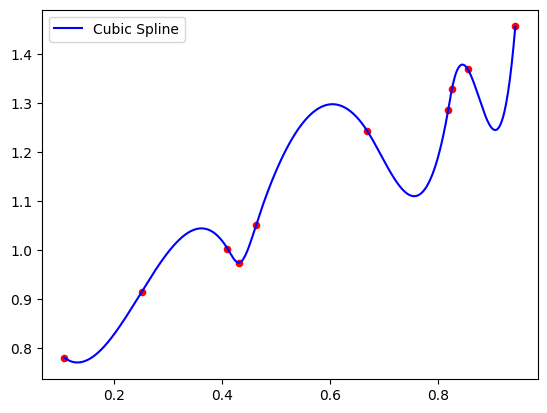

In [3]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

cs = CubicSpline(xarr, yarr)
xnew = np.linspace(xarr[0], xarr[-1], 500)
ynew = cs(xnew)
plt.scatter(xarr, yarr, color='red', s=20, alpha=1)
plt.plot(xnew, ynew, label='Cubic Spline', color='blue')
plt.legend()
plt.show()

## (b) Gaussian Process Regression

    i. Apply Gaussian Process regression for the provided data points (linear_data.txt) and plot the predicted y values with error bars both over, and outside of, the range of data.

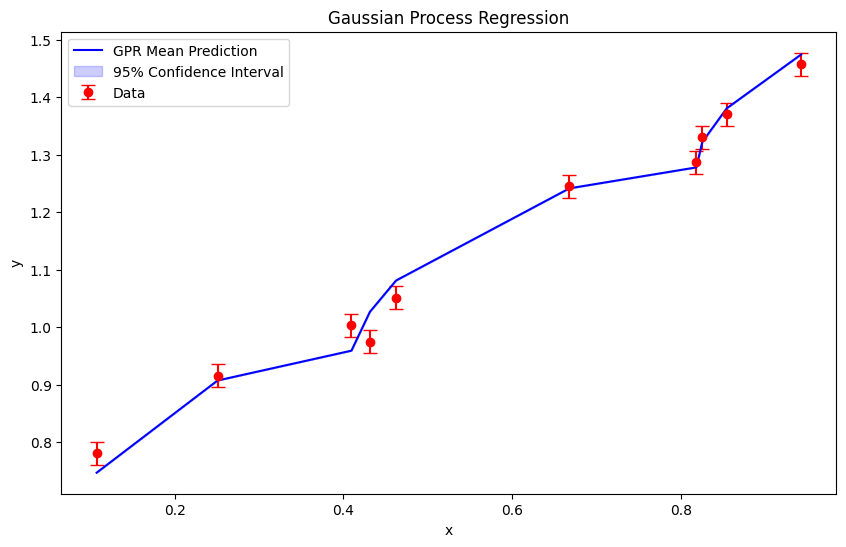

In [56]:
xdata = np.loadtxt('linear_data.txt')[:,0]
ydata = np.loadtxt('linear_data.txt')[:,1]
error = np.loadtxt('linear_data.txt')[:,2]

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
kernel = 1 * RBF(length_scale=0.1, length_scale_bounds=(1e-5, 1e5)) # DotProduct() + WhiteKernel() 
xdata = xdata.reshape(-1,1)
y_with_noise = ydata + np.random.normal(0, error)
gaussian_process = GaussianProcessRegressor(kernel=kernel,random_state=1,n_restarts_optimizer=9)
gpr = gaussian_process.fit(xdata, y_with_noise)
mean_pred, std_pred = gaussian_process.predict(xdata, return_std=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=error, fmt='o', c='r',capsize=5, label='Data')
plt.plot(xdata, mean_pred, 'b-', label='GPR Mean Prediction')
plt.fill_between(xdata.ravel(), mean_pred - 1.96 * std_pred,
                 mean_pred + 1.96 * std_pred, alpha=0.2, color='blue', label='95% Confidence Interval')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In [57]:
print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

Kernel parameters before fit:
1**2 * RBF(length_scale=0.1))
Kernel parameters after fit: 
0.971**2 * RBF(length_scale=0.0788) 
Log-likelihood: -5.392
